In [12]:
import os
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
import numpy as np 
import matplotlib.pyplot as plt

unsharpened_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/EMD_665_unsharpened_fullmap.mrc"
feature_enhanced_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/feature_enhance/emd_0665_feature_enhanced_mean.mrc"
deepemhancer_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/deepemhancer/emd_0665_deepemhancer.mrc"
emready_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/emready/emd_0665_emready_resampled.mrc"
mask_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks/emd_0665_FDR_confidence_final.map"

unsharpened_map, apix = load_map(unsharpened_map_path)
feature_enhanced_map, apix = load_map(feature_enhanced_map_path)
deepemhancer_map, apix = load_map(deepemhancer_map_path)
emready_map, apix = load_map(emready_map_path)
mask, apix = load_map(mask_path)

mask_binarized = np.where(mask > 0.99, 1, 0)



In [7]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from locscale.include.emmer.ndimage.fsc_util import calculate_phase_correlation_maps 
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
from locscale.include.emmer.ndimage.filter import get_cosine_mask
from tqdm import tqdm

# unsharpened_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/EMD_665_unsharpened_fullmap.mrc"
# feature_enhanced_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/feature_enhance/emd_0665_feature_enhanced_mean.mrc"
# deepemhancer_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/deepemhancer/emd_0665_deepemhancer.mrc"
# emready_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/emready/emd_0665_emready_resampled.mrc"
# mask_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks/emd_0665_FDR_confidence_final.map"

# unsharpened_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_33888/processing_files/EMD_33888_unsharpened_fullmap.mrc"
# feature_enhanced_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_33888/emd_33888_feature_enhanced_map_mean.mrc"
# deepemhancer_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_33888/deepemhancer/emd_33888.map"
# emready_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_33888/emready/emd_33888_emready.mrc"
# mask_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_33888/processing_files/EMD_33888_unsharpened_fullmap_confidenceMap_raw.mrc"

# unsharpened_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/sub_tomogram_analysis/emd_13234/EMD_13234_unsharpened_fullmap.mrc"
# feature_enhanced_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/sub_tomogram_analysis/emd_13234/feature_enhance/emd_13234_feature_enhance_mean.mrc"
# deepemhancer_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/sub_tomogram_analysis/emd_13234/deepemhancer/emd_13234_deepemhancer_wide.mrc"
# emready_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/sub_tomogram_analysis/emd_13234/emready/emd_13234_emready.mrc"
# mask_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/sub_tomogram_analysis/emd_13234/EMD_13234_unsharpened_fullmap_confidenceMap_custom_loc_5A.mrc"
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]

parent_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/"
feature_enhance_parent_folder = os.path.join(parent_dir, "outputs","feature_enhance_test_maps_hybrid_60k")
deepemhancer_parent_folder = os.path.join(parent_dir, "data","deepemhancer_maps_test")
emready_parent_folder = os.path.join(parent_dir, "outputs","emready_outputs")
mask_parent_folder = os.path.join(parent_dir, "data","confidence_masks")

input_files_emdb = {}
for emdb_pdb in EMDB_PDB_ids_epsilon:
    emdb, pdb = emdb_pdb.split("_")
    unsharpened_map_path = os.path.join(feature_enhance_parent_folder,f"{emdb_pdb}", f"EMD_{int(emdb)}_unsharpened_fullmap.mrc")
    feature_enhanced_map_path = os.path.join(feature_enhance_parent_folder, f"{emdb_pdb}", f"emd_{emdb}_emmernet_output_mean.mrc")
    deepemhancer_map_path = os.path.join(deepemhancer_parent_folder, f"{emdb_pdb}", f"emd_{emdb}_DeepEMhancer_wideTarget.map")
    emready_map_path = os.path.join(emready_parent_folder,f"{emdb_pdb}", f"emd_{emdb}_emready_output.mrc")
    mask_path = os.path.join(mask_parent_folder, f"emd_{emdb}_FDR_confidence_final.map")

    filenames_list = [mask_path, unsharpened_map_path, feature_enhanced_map_path, deepemhancer_map_path, emready_map_path]
    if not all([os.path.exists(filename) for filename in filenames_list]):
        # print which files are missing
        for filename in filenames_list:
            if not os.path.exists(filename):
                print(f"{filename} does not exist")

        continue

    input_files_emdb[emdb_pdb] = filenames_list


def get_recall_curve(emmap_path, mask_path, threshold=0.99):
    from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import precision_recall_curve
    from scipy.interpolate import interp1d

    emmap, apix = load_map(emmap_path)
    mask, apix = load_map(mask_path)
    mask_binarized = np.where(mask > threshold, 1, 0)

    emmap_positive = np.zeros(emmap.shape)
    emmap_positive[emmap > 0] = emmap[emmap > 0]
    print(emmap.shape)
    emmap_positive_rescaled = (emmap_positive - emmap_positive.min()) / (emmap_positive.max() - emmap_positive.min())
    
    precisions, recall, thresholds = precision_recall_curve(mask_binarized.flatten(), emmap_positive_rescaled.flatten())

    thresholds_new_range = np.linspace(thresholds.min(), thresholds.max(), 1000)
    f = interp1d(thresholds, recall[:-1])
    recall_new_range = f(thresholds_new_range)

    # calculate the area under the curve
    auc = np.trapz(recall_new_range, thresholds_new_range)
    contextual_information_index = auc 

    return recall_new_range, thresholds_new_range, contextual_information_index


def compare_recall_curves(mask_path, unsharpened_map_path, *map_paths):
    from locscale.include.emmer.ndimage.map_utils import resample_map
    
    masked_maps = {}
    unsharpened_map, apix = load_map(unsharpened_map_path)
    for emmap_path in map_paths:
        emmap_filename = os.path.basename(emmap_path)
        emmap, apix_map = load_map(emmap_path)
        if apix_map != apix:
            emmap = resample_map(emmap, apix=apix_map, apix_new=apix, assert_shape=unsharpened_map.shape, order=3)
            emmap_path = emmap_path.replace(".mrc", "_resampled.mrc")
            save_as_mrc(emmap, emmap_path, apix=apix)
            
        masked_maps[emmap_filename] = emmap_path


    recall_curves = {}
    for emmap_filename, emmap_path in masked_maps.items():
        recall_curves[emmap_filename] = get_recall_curve(emmap_path, mask_path)
    
    return recall_curves


/home/abharadwaj1/papers/elife_paper/figure_information/outputs/emready_outputs/0311_6hz5/emd_0311_emready_output.mrc does not exist


In [3]:
def pretty_plot_fsc_curve(freq,list_of_profiles_native,  \
                                legends=None,figsize_cm=(14,8), fontsize=10,linewidth=1, \
                                marker="o", markersize=5,font="Helvetica",fontscale=1, showlegend=True, showPoints=False, \
                                alpha=1, variation=None, yticks=None, ylims=None, xlims=None, crop_freq=None, labelsize=None, title=None):
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    from locscale.include.emmer.ndimage.profile_tools import crop_profile_between_frequency
    import seaborn as sns
    import matplotlib 
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    # set the global font size for the plot

        
    plt.rcParams.update({'font.size': fontsize})
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
    
    fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    # Set font size for all text in the figure
    sns.set_style("white")

    
    
    # Crop frequencies if required
    if crop_freq is not None:
        cropped_frequency = crop_profile_between_frequency(freq, list_of_profiles_native[0], crop_freq[0], crop_freq[1])[0]
        cropped_profiles = [crop_profile_between_frequency(freq, profile, crop_freq[0], crop_freq[1])[1] for profile in list_of_profiles_native]
    else:
        cropped_frequency = freq
        cropped_profiles = list_of_profiles_native
    
    final_list_of_profiles = cropped_profiles
    plot_frequency_axis = cropped_frequency
    
    # Add labels to the plot
    xlabel_top = r'Resolution, $d (\AA)$'

    xlabel = r'Spatial Frequency, $d^{-1} (\AA^{-1})$'
    ylabel = r'Phase Correlation'
    
    colors = cm.rainbow(np.linspace(0,1,len(final_list_of_profiles)))
    
    ax1.grid(False)
    ax2 = ax1.twiny()

    for i, profile in enumerate(final_list_of_profiles):
        if showPoints:
            ax1.plot(plot_frequency_axis, profile, marker=marker, markersize=markersize, color=colors[i], alpha=alpha, \
                        linewidth=linewidth, label=legends[i])
        else:
            ax1.plot(plot_frequency_axis, profile, color=colors[i], alpha=alpha, linewidth=linewidth, label=legends[i])
                
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xbound(ax1.get_xbound())
    ax2.set_xticklabels([round(1/x,1) for x in ax1.get_xticks()])
    #ax2.tick_params(axis="both", which="both", labelsize=labelsize)

    if showlegend:
        ax1.legend(loc="best")
    ax1.set_xlabel(xlabel)#, fontsize=fontsize)
    ax1.set_ylabel(ylabel)#, fontsize=fontsize)
    #ax1.tick_params(axis="both", which="both", labelsize=labelsize)
    ax2.set_xlabel(xlabel_top)#, fontsize=fontsize)
    
    if ylims is not None:
        plt.ylim(ylims)
    if yticks is not None:
        plt.yticks(yticks)
    if xlims is not None:
        plt.xlim(xlims)

    if title is not None:
        plt.title(title)
    plt.tight_layout()
    return fig


In [ ]:
from locscale.include.emmer.ndimage.profile_tools import frequency_array
fig_raw, ax_raw = plt.subplots(1,1,figsize=(6,3), dpi=600)
feature_enhanced_curves = []
deepemhancer_curves = []
emready_curves = []
threshold_curves = []
for emdb_pdb, filelist in input_files_emdb.items():
    emdb, pdb = emdb_pdb.split("_")
    mask_path, unsharpened_map_path, feature_enhanced_map_path, deepemhancer_map_path, emready_map_path = filelist
    recall_curves = compare_recall_curves(mask_path, unsharpened_map_path, feature_enhanced_map_path, deepemhancer_map_path, emready_map_path)
    unsharp_map, apix = load_map(unsharpened_map_path)

    thresholds = recall_curves[os.path.basename(feature_enhanced_map_path)][1]
    list_of_profiles_native = [recall_curves[os.path.basename(map_path)][0] for map_path in filelist[2:]]
    legends = ["Feature Enhanced", "DeepEMhancer", "EMready"]
    fig = pretty_plot_fsc_curve(thresholds, list_of_profiles_native, legends=legends, figsize_cm=(8,8), fontsize=10,linewidth=1, \
                                marker="o", markersize=5,font="Helvetica",fontscale=1, showlegend=True, showPoints=False, \
                                alpha=1, variation=None, yticks=None, ylims=None, xlims=None, crop_freq=None, labelsize=None, title=None)
    figsavepath = os.path.join(os.path.dirname(unsharpened_map_path), f"{emdb_pdb}_recall_curves_DE_wide.eps")
    fig.savefig(figsavepath, dpi=600, bbox_inches="tight")
    # add figure to the raw plot
    feature_enhanced_curves.append(recall_curves[os.path.basename(feature_enhanced_map_path)])
    deepemhancer_curves.append(recall_curves[os.path.basename(deepemhancer_map_path)])
    emready_curves.append(recall_curves[os.path.basename(emready_map_path)])
    threshold_curves.append(thresholds)





In [ ]:
fig_raw, ax_raw = plt.subplots(1,1, dpi=600)
for i in range(len(feature_enhanced_curves)):
    freq = threshold_curves[i]
    ax_raw.plot(freq, feature_enhanced_curves[i][0], label="Feature Enhanced", color="blue", alpha=0.5)
    ax_raw.plot(freq, deepemhancer_curves[i][0], label="DeepEMhancer", color="green", alpha=0.5)
    ax_raw.plot(freq, emready_curves[i][0], label="EMready", color="red", alpha=0.5)
    
ax_raw.set_xlabel("Threshold")
ax_raw.set_ylabel("Recall")
# hide legend
ax_raw.legend(["Feature Enhanced", "DeepEMhancer", "EMready"], loc="best")
plt.tight_layout()
figsavepath = os.path.join(parent_dir, "outputs", "recall_curves_all_DE_wide.eps")
plt.savefig(figsavepath, dpi=600, bbox_inches="tight")

In [ ]:
area_under_curve = {}
for i in range(len(feature_enhanced_curves)):
    # fe_area = np.trapz(feature_enhanced_curves[i][0], feature_enhanced_curves[i][1])
    # deepemhancer_area = np.trapz(deepemhancer_curves[i][0], deepemhancer_curves[i][1])
    # emready_area = np.trapz(emready_curves[i][0], emready_curves[i][1])
    fe_area = np.mean(feature_enhanced_curves[i][0])
    deepemhancer_area = np.mean(deepemhancer_curves[i][0])
    emready_area = np.mean(emready_curves[i][0])
    area_under_curve[list(input_files_emdb.keys())[i]] = [fe_area, deepemhancer_area, emready_area]


In [ ]:
import pandas as pd
area_under_curve_df = pd.DataFrame.from_dict(area_under_curve, orient="index", columns=["Feature Enhanced", "DeepEMhancer", "EMready"])

fig, ax = plt.subplots(1,1, dpi=600, figsize=(6,3))
sns.boxplot(data=area_under_curve_df, ax=ax, color="white", linewidth=1)
sns.swarmplot(data=area_under_curve_df, ax=ax, color="black", alpha=0.5)
ax.set_ylabel("Area under recall curve")
#ax.set_xlabel("Method")
plt.tight_layout()
#figsavepath = os.path.join(parent_dir, "outputs", "recall_curve_area_boxplot_DE_wide.eps")
#plt.savefig(figsavepath, dpi=600, bbox_inches="tight")



In [14]:

from sklearn.metrics import precision_recall_curve
# unsharpened_map_positive_values = unsharpened_map.copy()
# unsharpened_map_positive_values[unsharpened_map_positive_values < 0] = 0
# feature_enhanced_map_positive_values = feature_enhanced_map.copy()
# feature_enhanced_map_positive_values[feature_enhanced_map_positive_values < 0] = 0
# deepemhancer_map_positive_values = deepemhancer_map.copy()
# deepemhancer_map_positive_values[deepemhancer_map_positive_values < 0] = 0
# emready_map_positive_values = emready_map.copy()
# emready_map_positive_values[emready_map_positive_values < 0] = 0

# # rescale the maps to range 0 to 1
# unsharpened_map_positive_values_rescale = (unsharpened_map_positive_values - np.min(unsharpened_map_positive_values)) / (np.max(unsharpened_map_positive_values) - np.min(unsharpened_map_positive_values))
# feature_enhanced_map_positive_values_rescale = (feature_enhanced_map_positive_values - np.min(feature_enhanced_map_positive_values)) / (np.max(feature_enhanced_map_positive_values) - np.min(feature_enhanced_map_positive_values))
# deepemhancer_map_positive_values_rescale = (deepemhancer_map_positive_values - np.min(deepemhancer_map_positive_values)) / (np.max(deepemhancer_map_positive_values) - np.min(deepemhancer_map_positive_values))
# emready_map_positive_values_rescale = (emready_map_positive_values - np.min(emready_map_positive_values)) / (np.max(emready_map_positive_values) - np.min(emready_map_positive_values))

# precision_unsharp, recalls_unsharp, threshold_unsharp = precision_recall_curve(mask_binarized.flatten(), unsharpened_map_positive_values_rescale.flatten())
# precision_feature, recalls_feature, threshold_feature = precision_recall_curve(mask_binarized.flatten(), feature_enhanced_map_positive_values_rescale.flatten())
# precision_deep, recalls_deep, threshold_deep = precision_recall_curve(mask_binarized.flatten(), deepemhancer_map_positive_values_rescale.flatten())
# precision_emready, recalls_emready, threshold_emready = precision_recall_curve(mask_binarized.flatten(), emready_map_positive_values_rescale.flatten())

recall_curves = compare_recall_curves(mask_path, unsharpened_map_path, feature_enhanced_map_path, deepemhancer_map_path, emready_map_path)
unsharp_map, apix = load_map(unsharpened_map_path)



(200, 200, 200)
(200, 200, 200)
(200, 200, 200)


/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


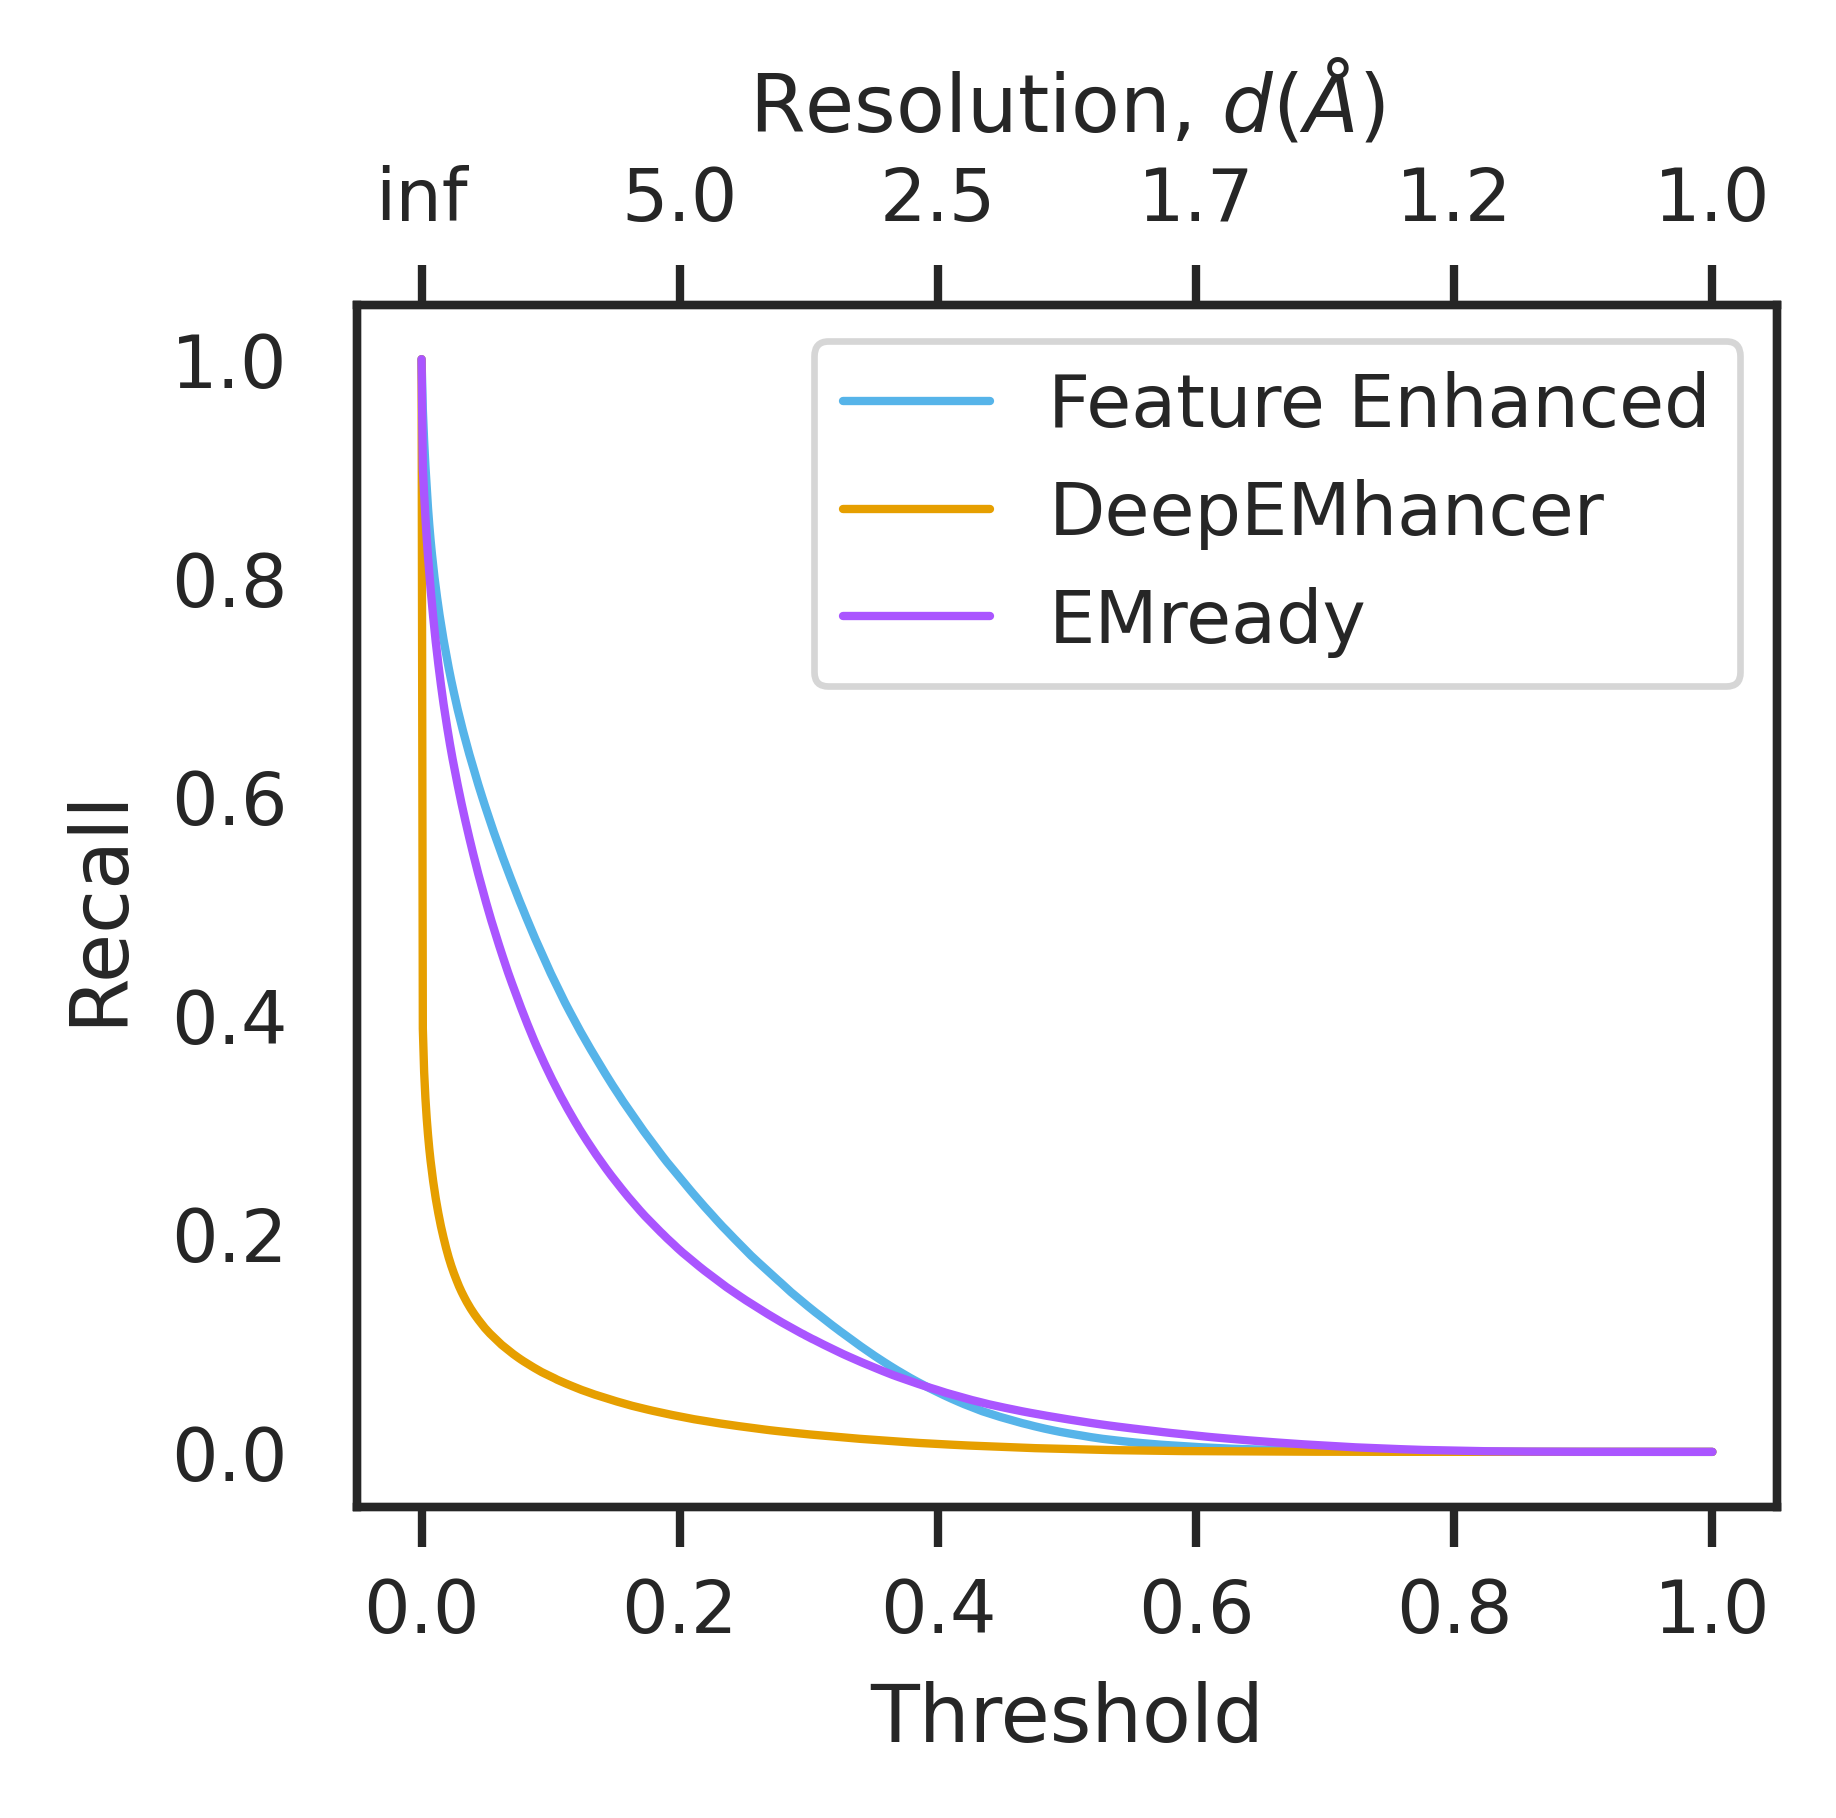

In [31]:
filelist = [mask_path, unsharpened_map_path, feature_enhanced_map_path, deepemhancer_map_path, emready_map_path]
thresholds = recall_curves[os.path.basename(feature_enhanced_map_path)][1]
list_of_profiles_native = [recall_curves[os.path.basename(map_path)][0] for map_path in filelist[2:]]
legends = ["Feature Enhanced", "DeepEMhancer", "EMready"]
fig_0665 = pretty_plot_fsc_curve(thresholds, list_of_profiles_native, legends=legends, figsize_cm=(8,8), fontsize=10,linewidth=1, \
                            marker="o", markersize=5,font="Helvetica",fontscale=1, showlegend=True, showPoints=False, \
                            alpha=1, variation=None, yticks=None, ylims=None, xlims=None, crop_freq=None, labelsize=None, title=None)

ax_0665 = fig_0665.get_axes()[0]
ax_0665.set_xlabel("Threshold")
ax_0665.set_ylabel("Recall")

ax_0665.get_lines()[0].set_color("#56b4e9")
ax_0665.get_lines()[1].set_color("#e69f00")
ax_0665.get_lines()[2].set_color("#aa55ff")
ax_0665.legend(["Feature Enhanced", "DeepEMhancer", "EMready"])
figsavepath = os.path.join(os.path.dirname(unsharpened_map_path), f"{emdb_pdb}_recall_curves_EMD_0665_new.eps")
fig_0665.savefig(figsavepath, dpi=600, bbox_inches="tight")


In [18]:
# print the recall values at threshold 0.1, 0.2 and 0.3 for all maps 
thresholds = recall_curves[os.path.basename(feature_enhanced_map_path)][1]
recall_feature = recall_curves[os.path.basename(feature_enhanced_map_path)][0]
recall_deep = recall_curves[os.path.basename(deepemhancer_map_path)][0]
recall_emready = recall_curves[os.path.basename(emready_map_path)][0]

recall_feature_01 = recall_feature[100]
recall_feature_02 = recall_feature[200]
recall_feature_03 = recall_feature[300]

recall_deep_01 = recall_deep[100]
recall_deep_02 = recall_deep[200]
recall_deep_03 = recall_deep[300]

recall_emready_01 = recall_emready[100]
recall_emready_02 = recall_emready[200]
recall_emready_03 = recall_emready[300]
print("Recall values at thresholds 0.1, 0.2 and 0.3")
print(f"Feature Enhanced: {recall_feature_01}, {recall_feature_02}, {recall_feature_03}")
print(f"DeepEMhancer: {recall_deep_01}, {recall_deep_02}, {recall_deep_03}")
print(f"EMready: {recall_emready_01}, {recall_emready_02}, {recall_emready_03}")



Recall values at thresholds 0.1, 0.2 and 0.3
Feature Enhanced: 0.437895786844456, 0.2507308197216293, 0.13230644160756003
DeepEMhancer: 0.06891312318758759, 0.03229158142166217, 0.01598727635905384
EMready: 0.3433389055352839, 0.18448058405370707, 0.1047915462159297


In [34]:
threshold_feature = recall_curves[os.path.basename(feature_enhanced_map_path)][1]
threshold_deep = recall_curves[os.path.basename(deepemhancer_map_path)][1]
threshold_emready = recall_curves[os.path.basename(emready_map_path)][1]

# check if the thresholds are the same
print("Thresholds are the same: ", np.allclose(threshold_feature, threshold_deep))
print("Thresholds are the same: ", np.allclose(threshold_feature, threshold_emready))

Thresholds are the same:  True
Thresholds are the same:  True


In [5]:
fig_0665 = pretty_plot_fsc_curve(threshold_unsharp, [recalls_feature, recalls_deep, recalls_emready], 
                                 legends=["Feature Enhanced", "DeepEMhancer", "EMready"], figsize_cm=(8,8), fontsize=10,linewidth=1, \
                                marker="o", markersize=5,font="Helvetica",fontscale=1, showlegend=True, showPoints=False, \
                                alpha=1, variation=None, yticks=None, ylims=None, xlims=None, crop_freq=None, labelsize=None, title=None)

# change X axis to threshold
ax_0665 = fig_0665.get_axes()[0]
ax_0665.set_xlabel("Threshold")
ax_0665.set_ylabel("Recall")
ax_0665.set_title("EMD-0665")
# figsavepath = os.path.join(parent_dir, "outputs", "emd_0665_recall_curves.eps")
# fig_0665.savefig(figsavepath, dpi=600, bbox_inches="tight")


NameError: name 'recalls_emready' is not defined

In [ ]:
plt.plot(threshold_unsharp, recalls_unsharp[:-1], label="Recall Unsharp")
plt.plot(threshold_unsharp, precision_unsharp[:-1], label="Precision Unsharp")
plt.legend()
plt.show()


In [ ]:
plt.plot(threshold_feature, recalls_feature[:-1], label="Recall Feature")
plt.plot(threshold_feature, precision_feature[:-1], label="Precision Feature")
plt.legend()
plt.show()

In [ ]:
plt.plot(threshold_deep, recalls_deep[:-1], label="Recall DeepEM")
plt.plot(threshold_deep, precision_deep[:-1], label="Precision DeepEM")
plt.legend()
plt.show()

In [ ]:
plt.plot(threshold_emready, recalls_emready[:-1], label="Recall EMReady")
plt.plot(threshold_emready, precision_emready[:-1], label="Precision EMReady")
plt.legend()
plt.show()


In [ ]:
index_when_unsharp_precision_1 = np.where(precision_unsharp[:-1] == 1)[0][0]
index_when_feature_precision_1 = np.where(precision_feature[:-1] == 1)[0][0]
index_when_deep_precision_1 = np.where(precision_deep[:-1] == 1)[0][0]
index_when_emready_precision_1 = np.where(precision_emready[:-1] == 1)[0][0]

threshold_unsharp_when_precision_1 = threshold_unsharp[index_when_unsharp_precision_1]
threshold_feature_when_precision_1 = threshold_feature[index_when_feature_precision_1]
threshold_deep_when_precision_1 = threshold_deep[index_when_deep_precision_1]
threshold_emready_when_precision_1 = threshold_emready[index_when_emready_precision_1]

plt.plot(threshold_unsharp, recalls_unsharp[:-1], label="Recall Unsharp")
plt.plot(threshold_unsharp, precision_unsharp[:-1], label="Precision Unsharp")
plt.axvline(x=threshold_unsharp_when_precision_1, color="red", linestyle="--")
plt.legend()


In [ ]:
plt.plot(threshold_feature, recalls_feature[:-1], label="Recall Feature")
plt.plot(threshold_feature, precision_feature[:-1], label="Precision Feature")
plt.axvline(x=threshold_feature_when_precision_1, color="red", linestyle="--")
plt.legend()


In [ ]:
plt.plot(threshold_deep, recalls_deep[:-1], label="Recall DeepEM")
plt.plot(threshold_deep, precision_deep[:-1], label="Precision DeepEM")
plt.axvline(x=threshold_deep_when_precision_1, color="red", linestyle="--")
plt.legend()


In [ ]:
plt.plot(threshold_emready, recalls_emready[:-1], label="Recall EMReady")
plt.plot(threshold_emready, precision_emready[:-1], label="Precision EMReady")
plt.axvline(x=threshold_emready_when_precision_1, color="red", linestyle="--")
plt.legend()
